In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
DATA_SET = pd.read_csv('./hrt.csv')
DATA_SET.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
DATA_SET = pd.DataFrame(DATA_SET,columns = ['cp', 'ca', 'oldpeak', 'thalach', 'thal', 'age', 'target'])
DATA_SET.head()

,cp,ca,oldpeak,thalach,thal,age,target
0,3,0,2.3,150,1,63,1
1,2,0,3.5,187,2,37,1
2,1,0,1.4,172,2,41,1
3,1,0,0.8,178,2,56,1
4,0,0,0.6,163,2,57,1


In [4]:
DATA_SET = pd.get_dummies(DATA_SET, columns = ['cp', 'ca', 'thal'])
DATA_SET.head()

,oldpeak,thalach,age,target,cp_0,cp_1,cp_2,cp_3,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,2.3,150,63,1,0,0,0,1,1,0,0,0,0,0,1,0,0
1,3.5,187,37,1,0,0,1,0,1,0,0,0,0,0,0,1,0
2,1.4,172,41,1,0,1,0,0,1,0,0,0,0,0,0,1,0
3,0.8,178,56,1,0,1,0,0,1,0,0,0,0,0,0,1,0
4,0.6,163,57,1,1,0,0,0,1,0,0,0,0,0,0,1,0


In [5]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'thalach', 'oldpeak']
DATA_SET[columns_to_scale] = standardScaler.fit_transform(DATA_SET[columns_to_scale])
DATA_SET.head()

,oldpeak,thalach,age,target,cp_0,cp_1,cp_2,cp_3,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,1.087338,0.015443,0.952197,1,0,0,0,1,1,0,0,0,0,0,1,0,0
1,2.122573,1.633471,-1.915313,1,0,0,1,0,1,0,0,0,0,0,0,1,0
2,0.310912,0.977514,-1.474158,1,0,1,0,0,1,0,0,0,0,0,0,1,0
3,-0.206705,1.239897,0.180175,1,0,1,0,0,1,0,0,0,0,0,0,1,0
4,-0.379244,0.583939,0.290464,1,1,0,0,0,1,0,0,0,0,0,0,1,0


In [6]:
Y = DATA_SET['target'].values
X = DATA_SET.drop(['target'], axis = 1).values

In [7]:
def get_score(model):
    ssplit=ShuffleSplit(n_splits=10,test_size=0.25,random_state = 0)
    results=cross_val_score(model,X,Y,cv=ssplit)
    return np.mean(results)

# Check For AddaBoost

## KNN - BOOSTING

In [8]:
KNN_scores = []
for k in range(1,21,1):
    model_KNN = KNeighborsClassifier(n_neighbors = k)
    boosting_model = AdaBoostClassifier(n_estimators=50, base_estimator=model_KNN,learning_rate=1, random_state = 0)
    KNN_scores.append(get_score(boosting_model)*100)

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 486, in fit
    return super().fit(X, y, sample_weight)
  File "c:\users\dell\appdata\local\programs\python\python38\lib\site-packa

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 486, in fit
    return super().fit(X, y, sample_weight)
  File "c:\users\dell\appdata\local\programs\python\python38\lib\site-packa

## SVM - BOOSTING


In [9]:
SVM_scores = {}
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    model_SVM = SVC(kernel = kernels[i],probability=True)
    boosting_model = AdaBoostClassifier(n_estimators=50, base_estimator=model_SVM,learning_rate=1, random_state = 0)
    SVM_scores[kernels[i]] = (get_score(boosting_model))
SVM_scores

{'linear': 0.6552631578947368,
 'poly': 0.6947368421052632,
 'rbf': 0.7513157894736842,
 'sigmoid': 0.6986842105263158}

In [10]:
model_SVM = SVC(kernel = 'rbf',probability=True)
get_score(AdaBoostClassifier(n_estimators=50, base_estimator=model_SVM,learning_rate=1, random_state = 0)) * 100


75.13157894736841

# DT - BOOSTING

In [11]:
DT_scores = []
for i in range(1, len(DATA_SET.columns)):
    model_DT = DecisionTreeClassifier(max_features = i, random_state = 0,)
    boosting_model = AdaBoostClassifier(n_estimators=50, base_estimator=model_DT,learning_rate=1, random_state = 0) 
    DT_scores.append(get_score(boosting_model))
DT_scores

[0.7460526315789473,
 0.7842105263157895,
 0.7460526315789474,
 0.7592105263157894,
 0.7592105263157896,
 0.7592105263157894,
 0.7881578947368421,
 0.7736842105263158,
 0.7802631578947369,
 0.7578947368421053,
 0.7552631578947369,
 0.743421052631579,
 0.7723684210526316,
 0.7723684210526315,
 0.7723684210526315,
 0.7776315789473685]

Text(0.5, 1.0, 'DT Classifier Accuracy for different Max Features')

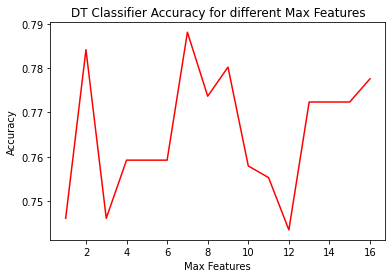

In [12]:
plt.plot([k for k in range(1, len(DATA_SET.columns))], DT_scores, color = 'red')
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.title('DT Classifier Accuracy for different Max Features')

In [13]:
max_DT_score  = -1
max_feature = -1
for index, val in enumerate(DT_scores):
    if(max_DT_score < val):
        max_DT_score = val
        max_feature = index + 1
max_feature

7

In [14]:
model_DT = DecisionTreeClassifier(max_features = max_feature, random_state = 0)
boosting_model = AdaBoostClassifier(n_estimators=50, base_estimator=model_DT,learning_rate=1, random_state = 0) 
get_score(boosting_model)*100

78.8157894736842

## RF - BOOSTING

In [15]:
model_RF = RandomForestClassifier(n_estimators = 100, random_state = 0)
boosting_model = AdaBoostClassifier(n_estimators=50, base_estimator=model_RF,learning_rate=1, random_state = 0) 
(get_score(boosting_model)*100)

81.44736842105263

## Naive Bayes - BOOSTING

In [16]:
model_NB = GaussianNB()
boosting_model = AdaBoostClassifier(n_estimators=50, base_estimator=model_NB,learning_rate=1, random_state = 0)
(get_score(boosting_model)*100)

47.89473684210526